
# Project: Investigate a Dataset (TMDb movie data!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **TMDb movie data!**:
>I have chosen the (TMDb movie data!) dataset from the given link below :-                                        
>https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True                                

>**This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.**


## I have decided  to answer the following questions :-
> **Q1**: In which month the maximum and minimum number of movies are released ?

> **Q2**: Which genres are most popular till now?

> **Q3**: What kinds of properties are associated with movies that have high revenues?

> **Q4**: Which actors have represented in the most no. of movies and which directors have directed the most no. of movies ?

> **Q5**: Is there any  change to movie properties with respect to time ?

In [1]:
# import statements for all of the packages that i planned to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from datetime import datetime

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [53]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('E:/DA_nanodegree/PROJECT3/Final_Project/tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [54]:
#checking the total no. of rows and columns
df.shape

(10866, 21)

In [55]:
df['keywords'].head()
# (...) column in df.head() is actually shown here as it is not properly shown there

0    monster|dna|tyrannosaurus rex|velociraptor|island
1     future|chase|post-apocalyptic|dystopia|australia
2    based on novel|revolution|dystopia|sequel|dyst...
3                android|spaceship|jedi|space opera|3d
4                  car race|speed|revenge|suspense|car
Name: keywords, dtype: object

In [56]:
#checking the no. of rows in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [57]:
#checking the no. of null values in each column 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [58]:
#total no. of rows containing null values
df.isnull().T.any().T.sum()

8874

In [59]:
#checking the homepage column
df['homepage'].head(5)

0                        http://www.jurassicworld.com/
1                          http://www.madmaxmovie.com/
2       http://www.thedivergentseries.movie/#insurgent
3    http://www.starwars.com/films/star-wars-episod...
4                             http://www.furious7.com/
Name: homepage, dtype: object

In [60]:
#checking the homepage column
df['homepage'].tail()

10861    NaN
10862    NaN
10863    NaN
10864    NaN
10865    NaN
Name: homepage, dtype: object

### It seems that the homepage contains the official website of the movie.
### As from my perspective,it is of no use calculating and analysing the data.

In [61]:
#checking if there are any duplicate values
df.duplicated().all()

False

In [62]:
#checking total duplicate values
df.duplicated().sum()

1

In [63]:
#checking the number of unique values 
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [64]:
#checking the data type of every column
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


## Data Cleaning 
> **Duplicate values were removed.**

> **Null values with respect to primary key ('imdb_id) were removed.**

> **Extraneous Columns were removed.**

> **Ir-regular data-types were changed to suitable data types.**

### Dropping duplicates

In [65]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop_duplicates(inplace=True)
#confirming changes
df.duplicated().sum()
#now we can see the number of duplicate values in the dataframe is zero

0

### Treating Null Values

In [66]:
#checking the rows where imdb_id is null
df[df['imdb_id'].isnull()].head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.0,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.0,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,NaN,Frank Paur,NaN,...,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.9,2009,0.0,0.0


#### As from my perspective,we can see that the above figure says that almost every row contains null values, so dropping them is satisfactory

In [67]:
#droppng null values corresponding to the imdb_id column 
df.dropna(subset=['imdb_id'],inplace=True)
#confirming changes
df.isnull().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7921
director                  40
tagline                 2817
keywords                1487
overview                   3
runtime                    0
genres                    21
production_companies    1025
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### Rest of the data is relatively clean , so i will not drop the null values from other columns.

### Dropping Extraneous Columns

In [68]:
#checking extraneous columns
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### I decided to drop the following following columns as that will not provide any useful info :-
> 'id' 
> 'homepage'
> 'keywords'
> 'tagline'
> 'overview'

In [69]:
#creating a list for the columns to be dropped
dlist = [ 'id', 'homepage', 'keywords', 'tagline','overview']
#dropping the columns
df.drop(dlist, axis=1, inplace=True)
#confirming changes
df.head(1)

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### Changing the data types 

In [70]:
#checking the dtype of 'release_date'
df['release_date'].dtypes

dtype('O')

### As we can see the 'release_date' is of object type , we need to change it to datetime .

In [71]:
#changing the dtype
df['release_date'] = pd.to_datetime(df['release_date'])

In [72]:
#confirming the changes
df['release_date'].dtypes

dtype('<M8[ns]')

### Now we need to extract the month from datetime,so that we can perform operations on it in the next section.

In [73]:
#creating a new column 'release_month' and assigning it a new value from 'release_date'
df['release_month']=df['release_date']
#verifying if done !!
df['release_month'].iloc[1]

Timestamp('2015-05-13 00:00:00')

In [74]:
#extracting the month from datetime variables
df['release_month'] = df['release_month'].dt.month

In [75]:
#creating a duplicate for future reference
df['release_month_num'] = df['release_month']

In [76]:
#converting it to strings
df['release_month'] = df['release_month'].astype(str)

In [77]:
#confirming if done !!
df['release_month'].dtype

dtype('O')

In [78]:
#Converting the month values to more user readable data !!
df['release_month']=df['release_month'].str.replace('12','December')
df['release_month']=df['release_month'].str.replace('11','November')
df['release_month']=df['release_month'].str.replace('10','October')
df['release_month']=df['release_month'].str.replace('9','September')
df['release_month']=df['release_month'].str.replace('8','August')
df['release_month']=df['release_month'].str.replace('7','July')
df['release_month']=df['release_month'].str.replace('6','June')
df['release_month']=df['release_month'].str.replace('5','May')
df['release_month']=df['release_month'].str.replace('4','April')
df['release_month']=df['release_month'].str.replace('3','March')
df['release_month']=df['release_month'].str.replace('2','February')
df['release_month']=df['release_month'].str.replace('1','January')

#### We have started replacing variable from 12 to 1 here,because if we start from 1 to 12 , 
#### replacing 1 with january will replace 11 as januaryjanuary . 

In [79]:
#confirming the changes 
df['release_month'].head(2)

0    June
1     May
Name: release_month, dtype: object

In [80]:
#checking if the applied formula is correct and we have got 12 unique values or not
df['release_month'].unique(),df['release_month'].nunique()

(array(['June', 'May', 'March', 'December', 'April', 'September',
        'October', 'February', 'January', 'July', 'November', 'August'],
       dtype=object), 12)

### Removing the erroneous values

#### If we see the dataset closely then we will figure out that revenue, budget and runtime have several Zero values... We need to remove them as well as they are creating noise in our analysis.

#### -> As from my perspective, a movie can be made with zero budget and some movies can gain zero revenue .so i will not make any changes to them.

In [81]:
df[df['runtime']==0].head(1)

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_month_num
92,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,11,5.4,2015,0.0,0.0,December,12


In [82]:
sum(df['runtime']==0)
#as we can see that the total values containing erreneous values are 31 and as compared to the total values are very less
#we can drop them directly

31

In [83]:
#dropping the zero values
df=df[df['runtime']!=0]

In [84]:
#confirming the change
sum(df['runtime']==0)

0

<a id='eda'></a>
## Exploratory Data Analysis



## Research Question 1 ( In which month the maximum and minimum number of movies are released ?)

In [85]:
#checking which parameters are needed for this question to be answered !!
df.head(2)

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_month_num
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June,6
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,May,5


In [86]:
#using groupby to get the number of movies released in each month
rq_1=df.groupby(['release_month_num','release_month'],as_index=False)['imdb_id'].count()
#sorting them in the month order
rq_1.sort_values('release_month_num')
#dropping the 'release_month_num' column as it is of no use now !.
rq_1.drop(['release_month_num'],axis=1, inplace=True)

In [87]:
#renaming the column to a more understandble name
rq_1.rename(columns={'imdb_id':'Count'},inplace=True)
#displaying the final dataframe
rq_1

,release_month,Count
0,January,910
1,February,689
2,March,820
3,April,795
4,May,806
5,June,823
6,July,798
7,August,916
8,September,1328
9,October,1146


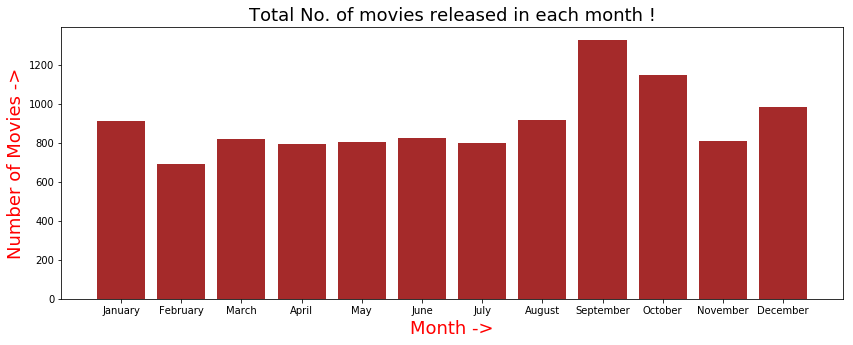

In [88]:
#setting the figure size 
plt.subplots(figsize=(14, 5))
#plotting the graph
plt.bar( rq_1.release_month , rq_1.Count ,color='brown')
#setting the graph title
plt.title('Total No. of movies released in each month !',color='black', fontsize = 18)
#setting the x-label
plt.xlabel('Month ->',color='r', fontsize = 18)
#setting the y-label
plt.ylabel('Number of Movies ->',color='r', fontsize = 18);

##### So , we can see from the above graph , that the maximum no. of movies are released in September. 
##### The minimum number of movies are released in the month of February !
#### __________________________________________________________________________________

## Research Question 2  (Which genres are most popular till now?)

In [89]:
#checking which columns of data are required to answer the question!
df.head(1)

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_month_num
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June,6


In [90]:
#splitting the hybrid genres into single type
rq_2 = df['genres'].str.cat(sep="|").split("|")
#creating a data-frame from the output received
rq_2 =pd.DataFrame(rq_2)
#giving a column-name
rq_2.columns = ['genre']
#verifying the result
rq_2.head(2)

,genre
0,Action
1,Adventure


In [91]:
#checking the total values of genres
A=rq_2['genre'].value_counts(ascending=False).sum()

In [92]:
#creating a duplicate of genre column to perform operations
rq_2['genre_copy']=list(rq_2['genre'])

In [93]:
#deriving the count of each genre type by using group by method !
rq_2=rq_2.groupby('genre',as_index=False)['genre_copy'].count()

In [94]:
#giving new names to the columns!
rq_2.columns = ['genre_type', 'no_of_movies']
#sorting with max to min
rq_2.sort_values(['no_of_movies'],ascending=True,inplace=True)
#confirming the change
rq_2.head(3)

,genre_type,no_of_movies
16,TV Movie,164
19,Western,165
9,Foreign,187


In [95]:
#deriving and storing the sum into a new variable !
B=rq_2['no_of_movies'].sum()

In [96]:
#checking the initial sum and the derived sum is equal or not 
A==B
#if true, than we have cover all the values

True

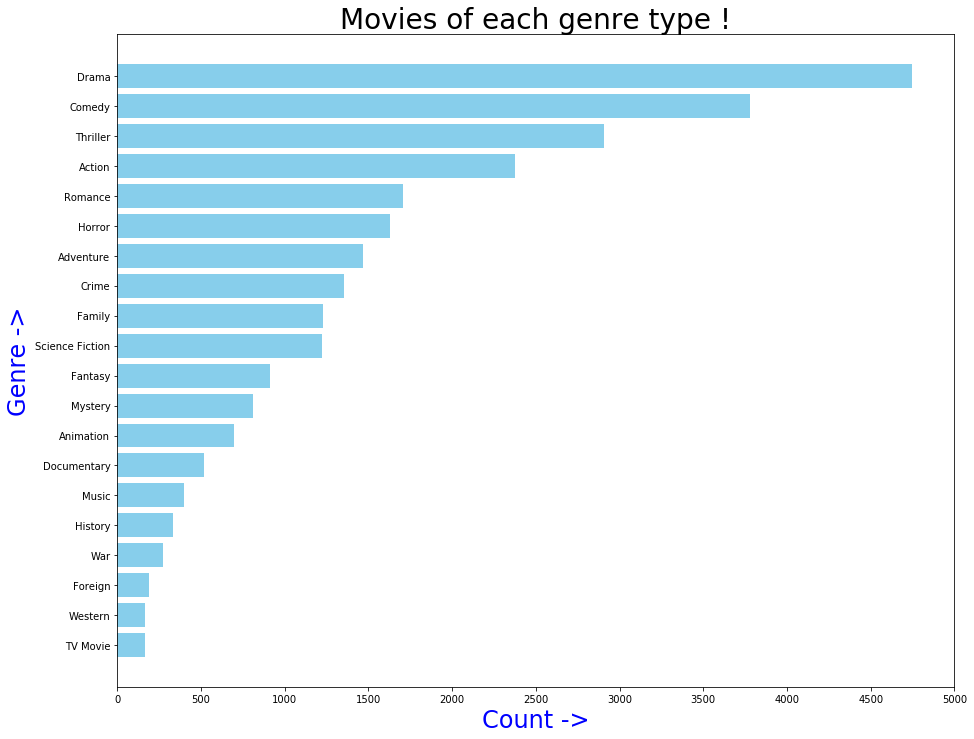

In [97]:
#setting the figure size 
plt.subplots(figsize=(15,12))
#plotting the graph
plt.barh( rq_2.genre_type , rq_2.no_of_movies  ,color='skyblue')
#setting the graph title
plt.title('Movies of each genre type !',color='black', fontsize = 28)
#setting the x-label
plt.xlabel('Count ->',color='b', fontsize = 24)
#setting the y-label
plt.ylabel('Genre ->',color='b', fontsize = 24)
#using the numpy function arange() for more clearified x-axis
plt.xticks(np.arange(0,5001,500));

#### It seems that the drama, comedy, thriller and action are the most famous genres.

## Research Question 3  (What kinds of properties are associated with movies that have high revenues?)


In [98]:
#checking which columns of data are required to answer the question!
df.head(1)

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_month_num
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June,6


In [99]:
#checking the total entries
df.shape

(10824, 18)

In [100]:
#finding the mean of the revenue_adj 
revenue_mean=df['revenue_adj'].mean()

#### I had taken revenue_adj here because of the inflation with time.

In [101]:
#finding queries with higher revenues
rq_3=df[df['revenue_adj']>=revenue_mean]

In [102]:
#verifying the result
rq_3.head(1)

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_month_num
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June,6


In [103]:
#total entries with higher revenues !
rq_3.shape

(2259, 18)

In [104]:
#dropping the unwanted columns
rq_3.drop(['imdb_id','budget','revenue','original_title','release_date','release_month_num'],axis=1, inplace=True)

C:\Users\Himanshu Sharma\Anaconda2\envs\py36\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [105]:
#verifying the result
rq_3.head(1)

,popularity,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,June


In [106]:
#defining the co-relation table
corr_values=rq_3.corr()
corr_values

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.155332,0.756818,0.320795,0.271959,0.357696,0.492242
runtime,0.155332,1.000000,0.222524,0.358697,-0.094126,0.245524,0.212543
vote_count,0.756818,0.222524,1.000000,0.411464,0.333613,0.474181,0.606408
vote_average,0.320795,0.358697,0.411464,1.000000,-0.143684,-0.018139,0.269783
release_year,0.271959,-0.094126,0.333613,-0.143684,1.000000,0.283264,-0.027144
budget_adj,0.357696,0.245524,0.474181,-0.018139,0.283264,1.000000,0.485582
revenue_adj,0.492242,0.212543,0.606408,0.269783,-0.027144,0.485582,1.000000


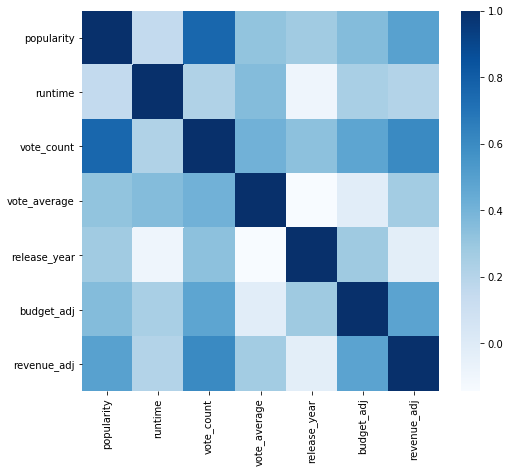

In [107]:
#potting the heatmap with the co-relation values
plt.subplots(figsize=(8,7))
sns.heatmap(corr_values, cmap="Blues");

### From the above heatmap, we can see that the Revenue is co-related maximum with Popularity, vote_count and budget . 

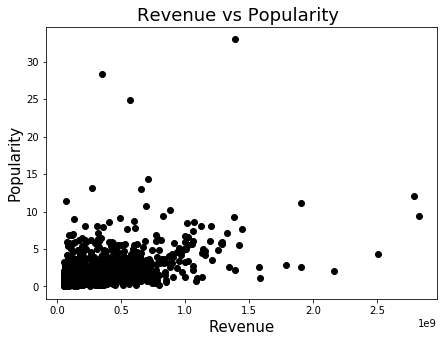

In [108]:
#setting the figure size 
plt.subplots(figsize=(7,5))
# Creating the scatterplot
plt.scatter(x=rq_3['revenue_adj'], y=rq_3['popularity'],color='black')
#setting the x-label
plt.xlabel('Revenue',color='black', fontsize = 15)
#setting the y-label
plt.ylabel('Popularity',color='black', fontsize = 15)
#setting the graph title
plt.title('Revenue vs Popularity ', fontsize = 18);

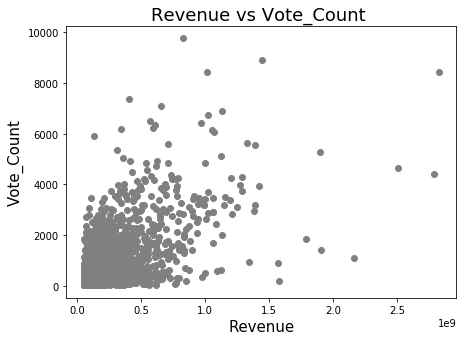

In [109]:
#setting the figure size 
plt.subplots(figsize=(7,5))
# Creating the scatterplot
plt.scatter(x=rq_3['revenue_adj'], y=rq_3['vote_count'],color='grey')
#setting the x-label
plt.xlabel('Revenue',color='black', fontsize = 15)
#setting the y-label
plt.ylabel('Vote_Count',color='black', fontsize = 15)
#setting the graph title
plt.title('Revenue vs Vote_Count ',color='black', fontsize = 18);

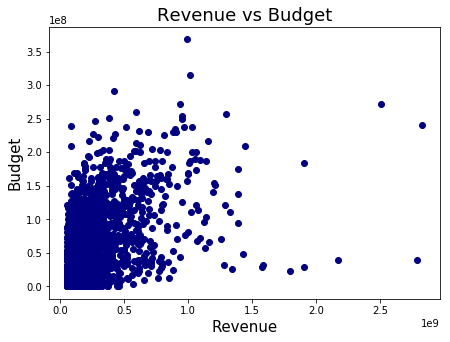

In [110]:
#setting the figure size 
plt.subplots(figsize=(7,5))
# Creating the scatterplot
plt.scatter(x=rq_3['revenue_adj'], y=rq_3['budget_adj'],color='navy')
#setting the x-label
plt.xlabel('Revenue',color='black', fontsize = 15)
#setting the y-label
plt.ylabel('Budget',color='black', fontsize = 15)
#setting the graph title
plt.title('Revenue vs Budget',color='black', fontsize = 18);

## Research Question 4 ( Which actors have represented in the most no. of movies and which directors have directed the most no. of movies ? )


In [111]:
#checking which columns of data are required to answer the question!
df.head(1)

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_month_num
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June,6


In [112]:
#splitting the hybrid cast into single type
rq_4 = df['cast'].str.cat(sep="|").split("|")
#creating a data-frame from the output received
rq_4 =pd.DataFrame(rq_4)
#giving a column-name
rq_4.columns = ['actor']

In [113]:
#creating a duplicate of cast column to perform operations
rq_4['actor_copy']=list(rq_4['actor'])

In [114]:
#deriving solo list of directors
rq_4['director']=pd.Series(df['director'].str.cat(sep="|").split("|"))
#creating a copy of it
rq_4['director_copy']=list(rq_4['director'])
#verifying the final dataframe
rq_4.head(1)

,actor,actor_copy,director,director_copy
0,Chris Pratt,Chris Pratt,Colin Trevorrow,Colin Trevorrow


In [115]:
#deriving the count of movies acted in 
rq_4a=rq_4.groupby('actor',as_index=False)['actor_copy'].count()

In [116]:
#renaming the column
rq_4a.rename(columns={'actor_copy':'no_of_movies'},inplace=True)
#verifying the result
rq_4a.head(1)

,actor,no_of_movies
0,Larry Mullen Jr.,2


In [117]:
#sorting the dataframe from max to min 
rq_4a.sort_values(['no_of_movies'],ascending=False,inplace=True)
#the final result is shown 
rq_4a.head()

,actor,no_of_movies
15280,Robert De Niro,72
16017,Samuel L. Jackson,71
2498,Bruce Willis,62
13569,Nicolas Cage,61
12536,Michael Caine,53


### The above head of the dataframe rq_4a shows the actors with the most number of movies worked in.

In [118]:
#deriving the count of movies directed
rq_4b=rq_4.groupby('director',as_index=False)['director_copy'].count()

In [119]:
#renaming the column
rq_4b.rename(columns={'director_copy':'no_of_movies_directed'},inplace=True)
#verifying the result
rq_4b.head(1)

,director,no_of_movies_directed
0,FrÃ©dÃ©ric Jardin,1


In [120]:
#sorting the dataframe from max to min 
rq_4b.sort_values(['no_of_movies_directed'],ascending=False,inplace=True)
#the final result is shown 
rq_4b.head()

,director,no_of_movies_directed
5259,Woody Allen,46
935,Clint Eastwood,34
3344,Martin Scorsese,31
4837,Steven Spielberg,30
4244,Ridley Scott,23


### The above head of the dataframe rq_4b shows the directors with the most number of movies directed.

## Research Question 5 (  Is there any  change to movie properties with respect to time ? )

In [121]:
#checking which columns of data are required to answer the question!
df.head(1)

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_month_num
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June,6


In [122]:
rq_5=df

In [123]:
rq_5.drop(['imdb_id','original_title','cast','director','genres','production_companies','release_date','release_month_num'],axis=1,inplace=True)

In [124]:
rq_5.head(1)

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,32.985763,150000000,1513528810,124,5562,6.5,2015,1.379999e+08,1.392446e+09,June


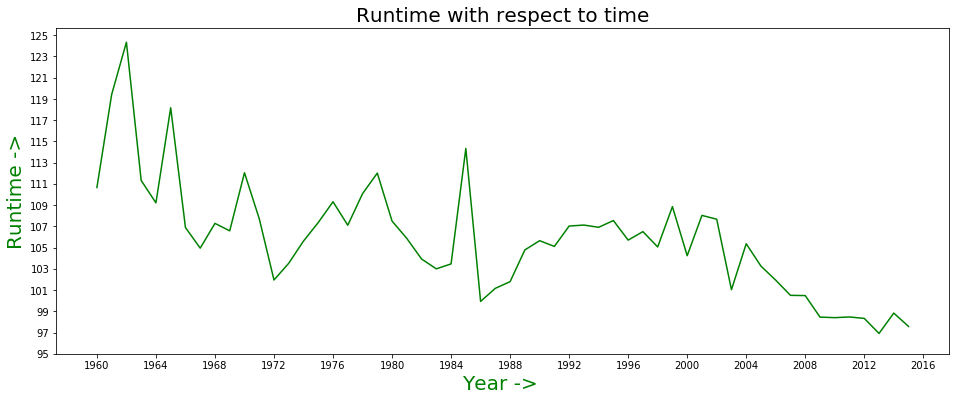

In [125]:
#assigning the parameters to be plotted in a variable
graph1=rq_5.groupby('release_year')['runtime'].mean()
#setting the graph size
plt.subplots(figsize=(16,6))
#plotting the graph
graph1.plot(color='green')
#setting the x-label
plt.xlabel('Year -> ',color='green', fontsize = 20)
#setting the y-label
plt.ylabel('Runtime ->',color='green', fontsize = 20)
#setting the graph title
plt.title('Runtime with respect to time',color='black', fontsize = 20)
#using the numpy function arange() for more clearified x-axis
plt.xticks(np.arange(1960,2020,4))
plt.yticks(np.arange(95,127,2));

#### It seems that the runtime has declined over time . People love to see short movies instead of long movies .

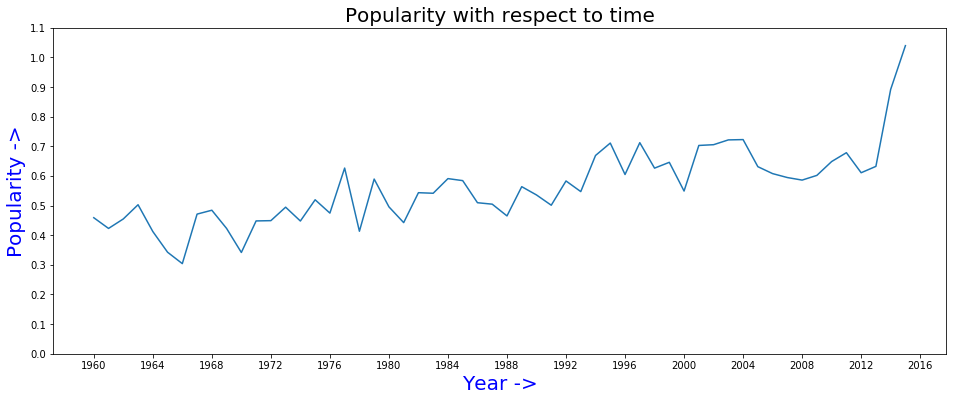

In [126]:
#assigning the parameters to be plotted in a variable
graph1=rq_5.groupby('release_year')['popularity'].mean()
#setting the graph size
plt.subplots(figsize=(16,6))
#plotting the graph
graph1.plot()
#setting the x-label
plt.xlabel('Year ->',color='blue', fontsize = 20)
#setting the y-label
plt.ylabel('Popularity ->',color='blue', fontsize = 20)
#setting the graph title
plt.title('Popularity with respect to time',color='black', fontsize = 20)
#using the numpy function arange() for more clearified x-axis
plt.xticks(np.arange(1960,2020,4));
plt.yticks(np.arange(0,1.2,0.1));

#### It seems that popularity of movies have increased over time. 

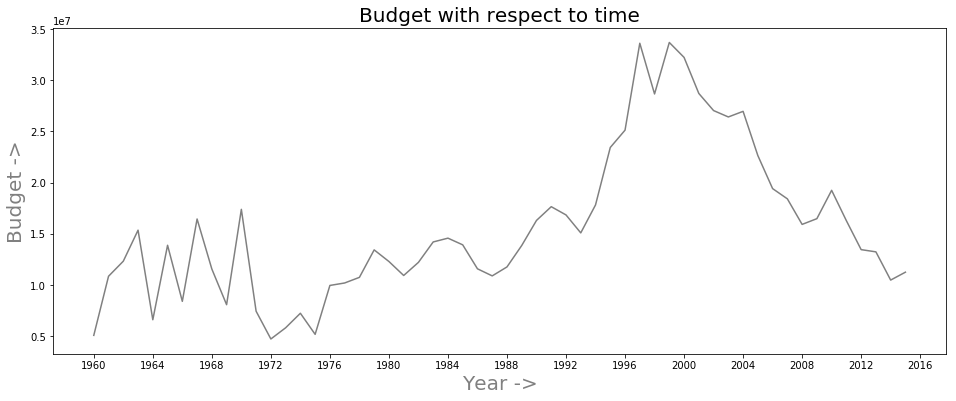

In [127]:
#assigning the parameters to be plotted in a variable
graph1=rq_5.groupby('release_year')['budget_adj'].mean()
#setting the graph size
plt.subplots(figsize=(16,6))
#plotting the graph
graph1.plot(color='grey')
#setting the x-label
plt.xlabel('Year ->',color='grey', fontsize = 20)
#setting the y-label
plt.ylabel('Budget ->',color='grey', fontsize = 20)
#setting the graph title
plt.title('Budget with respect to time',color='black', fontsize = 20)
#using the numpy function arange() for more clearified x-axis
plt.xticks(np.arange(1960,2020,4));

#### Taking inflation into consideration, the Budget of movies have decreased from the past two decades.

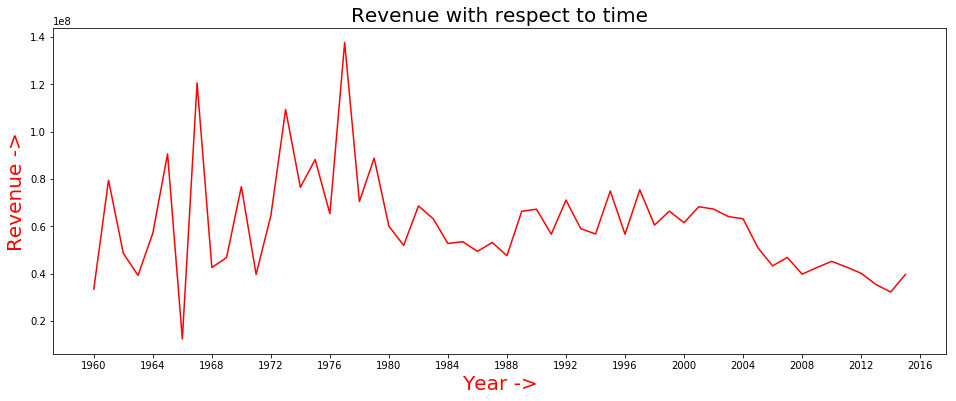

In [128]:
#assigning the parameters to be plotted in a variable
graph1=rq_5.groupby('release_year')['revenue_adj'].mean()
#setting the graph size
plt.subplots(figsize=(16,6))
#plotting the graph
graph1.plot(color='red')
#setting the x-label
plt.xlabel('Year ->',color='red', fontsize = 20)
#setting the y-label
plt.ylabel('Revenue ->',color='red', fontsize = 20)
#setting the graph title
plt.title('Revenue with respect to time',color='black', fontsize = 20)
#using the numpy function arange() for more clearified x-axis
plt.xticks(np.arange(1960,2020,4));

#### Taking inflation into consideration, the revenue of movies have decreased with respect to 1960's and 1970's.

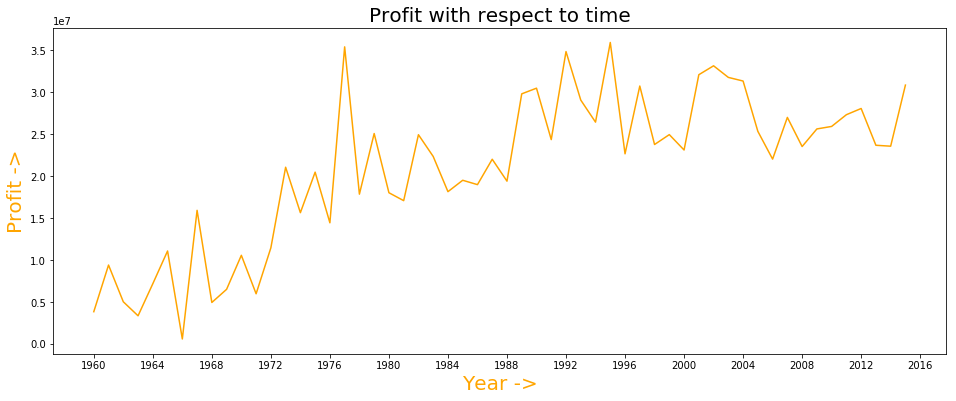

In [129]:
#making a  new column (profit)
rq_5['profit']=rq_5['revenue']-rq_5['budget']
#assigning the parameters to be plotted in a variable
graph1=rq_5.groupby('release_year')['profit'].mean()
#setting the graph size
plt.subplots(figsize=(16,6))
#plotting the graph
graph1.plot(color='orange')
#setting the x-label
plt.xlabel('Year ->',color='orange', fontsize = 20)
#setting the y-label
plt.ylabel('Profit ->',color='orange', fontsize = 20)
#setting the graph title
plt.title('Profit with respect to time',color='black', fontsize = 20)
#using the numpy function arange() for more clearified x-axis
plt.xticks(np.arange(1960,2020,4));

#### It seems that profit of movies have increased over time. 

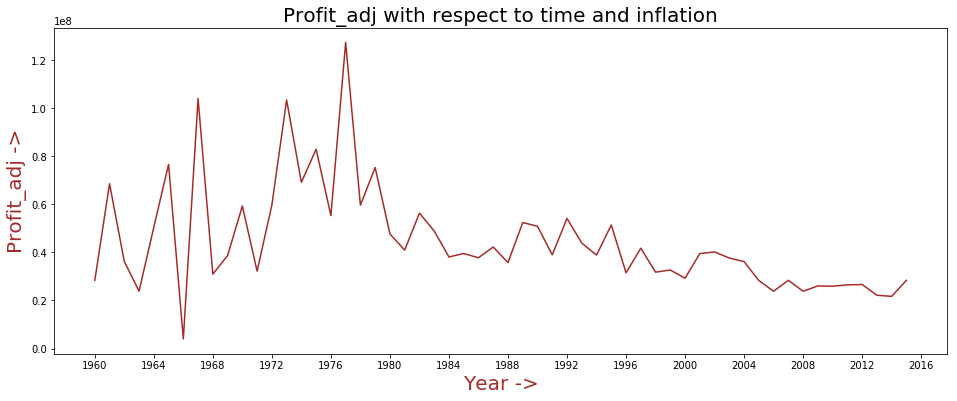

In [130]:
#making a  new column (profit_adj)
rq_5['profit']=rq_5['revenue_adj']-rq_5['budget_adj']
#assigning the parameters to be plotted in a variable
graph1=rq_5.groupby('release_year')['profit'].mean()
#setting the graph size
plt.subplots(figsize=(16,6))
#plotting the graph
graph1.plot(color='brown')
#setting the x-label
plt.xlabel('Year ->',color='brown', fontsize = 20)
#setting the y-label
plt.ylabel('Profit_adj ->',color='brown', fontsize = 20)
#setting the graph title
plt.title('Profit_adj with respect to time and inflation',color='black', fontsize = 20)
#using the numpy function arange() for more clearified x-axis
plt.xticks(np.arange(1960,2020,4));

#### Taking inflation into consideration, the profit of movies have decresed with respect to 1960's and 1970's.


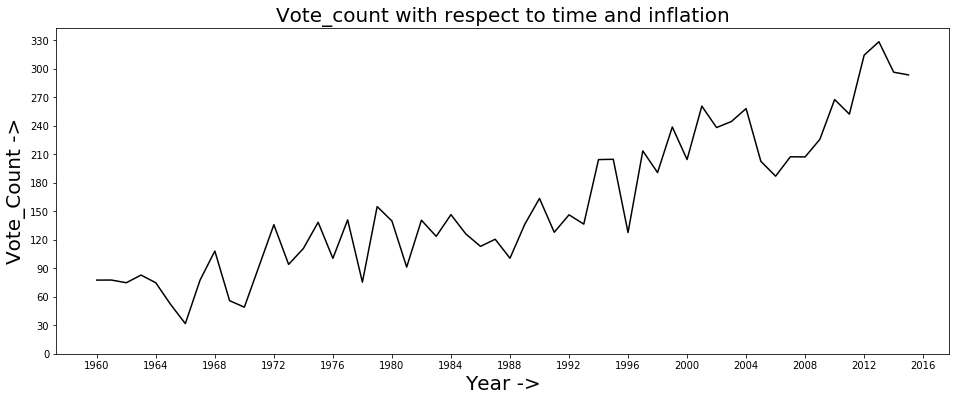

In [131]:
#assigning the parameters to be plotted in a variable
graph1=rq_5.groupby('release_year')['vote_count'].mean()
#setting the graph size
plt.subplots(figsize=(16,6))
#plotting the graph
graph1.plot(color='black')
#setting the x-label
plt.xlabel('Year ->',color='black', fontsize = 20)
#setting the y-label
plt.ylabel('Vote_Count ->',color='black', fontsize = 20)
#setting the graph title
plt.title('Vote_count with respect to time and inflation',color='black', fontsize = 20)
#using the numpy function arange() for more clearified x-axis
plt.xticks(np.arange(1960,2020,4));
plt.yticks(np.arange(0,350,30));

#### It seems that vote_count of movies have increased over time. 

<a id='conclusions'></a>
## Conclusions

> **->**: Most of the movies are released in the months of September, October , December and January.

> **->**: Drama, comedy, thriller,action and romance are the most famous genres.

> **->**: History, war, foreign, tv movie and western are the least famous genres.

> **->**: Movies that have high revenues are usully big budget movies and gain huge popularity and vote_count.

> **->**: Robert De Niro is seen acting in the most number of movies i.e. 72, Samuel L. Jackson and Bruce Willis are at second and third position with 71 and 62 movies respectively.

> **->**: Woody Allen have directed the most number of movies i.e. 46, Clint Eastwood and Martin Scorses  are at second and third position with 34 and 31 movies respectively.

> **->**: It seems that the runtime has declined over time . People love to see short movies instead of long movies .

> **->**: It seems that popularity of movies have increased over time. People have started showing love to movies. Also we can say quality movies are also being produced over time.

> **->**: Taking inflation into consideration, the Budget of movies have decreased from the past two decades.

> **->**: Taking inflation into consideration, the revenue of movies have decreased with respect to 1960's and 1970's.

> **->**: It seems that profit of movies have increased over time. But taking inflation into consideration, the profit of movies have decresed with respect to 1960's and 1970's.


> **->**: It seems that vote_count of movies have increased over time.

## Limitations

> **->**: The data doesn't seems to be purely accurate as it has a lot of null values.

> **->**: Also,it has some non-justified values such as budget ,revenues and run-times of movies are somewhere 0,2 or minimal like that which is not possible as from my perspective.

